# Chaikin Money Flow (CMF)

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:chaikin_money_flow_cmf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-06-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,187.990005,190.259995,187.750000,190.240005,188.109222,23442500
2018-06-04,191.639999,193.419998,191.350006,191.830002,189.681396,26266200
2018-06-05,193.070007,193.940002,192.360001,193.309998,191.144821,21566000
2018-06-06,193.630005,194.080002,191.919998,193.979996,191.807312,20933600
2018-06-07,194.139999,194.199997,192.339996,193.460007,191.293152,21347200


In [3]:
n = 20
df['MF_Multiplier'] = (2*df['Adj Close'] - df['Low'] - df['High'])/(df['High']-df['Low'])
df['MF_Volume'] = df['MF_Multiplier']*df['Volume']
df['CMF'] = df['MF_Volume'].rolling(n).sum()/df['Volume'].rolling(n).sum()
df = df.drop(['MF_Multiplier','MF_Volume'],axis=1)

In [4]:
df.head(30)

,Open,High,Low,Close,Adj Close,Volume,CMF
Date,,,,,,,
2018-06-01,187.990005,190.259995,187.750000,190.240005,188.109222,23442500,NaN
2018-06-04,191.639999,193.419998,191.350006,191.830002,189.681396,26266200,NaN
2018-06-05,193.070007,193.940002,192.360001,193.309998,191.144821,21566000,NaN
2018-06-06,193.630005,194.080002,191.919998,193.979996,191.807312,20933600,NaN
2018-06-07,194.139999,194.199997,192.339996,193.460007,191.293152,21347200,NaN
2018-06-08,191.169998,192.000000,189.770004,191.699997,189.552856,26656800,NaN
2018-06-11,191.350006,191.970001,190.210007,191.229996,189.088135,18308500,NaN
2018-06-12,191.389999,192.610001,191.149994,192.279999,190.126358,16911100,NaN
2018-06-13,192.419998,192.880005,190.440002,190.699997,188.564056,21638400,NaN


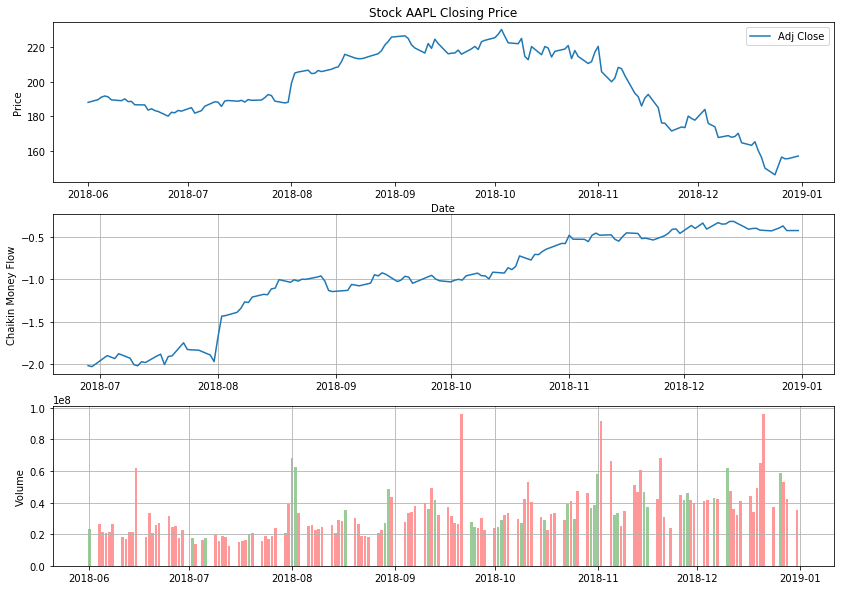

In [5]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CMF'])
#df['Positive'] = df['CMF'] > 0
#ax2.bar(df.index, df['CMF'], color=df.Positive.map({True: 'g', False: 'r'}))
#ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Chaikin Money Flow')

ax3 = plt.subplot(3, 1, 3)
df['Positive'] = df['Open'] < df['Adj Close']
colors = df.Positive.map({True: 'g', False: 'r'})
ax3.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid(True)

# Candlestick with CMF

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,CMF,Positive,VolumePositive
0,736846.0,187.990005,190.259995,187.750000,190.240005,188.109222,23442500,NaN,True,True
1,736849.0,191.639999,193.419998,191.350006,191.830002,189.681396,26266200,NaN,False,False
2,736850.0,193.070007,193.940002,192.360001,193.309998,191.144821,21566000,NaN,False,False
3,736851.0,193.630005,194.080002,191.919998,193.979996,191.807312,20933600,NaN,False,False
4,736852.0,194.139999,194.199997,192.339996,193.460007,191.293152,21347200,NaN,False,False


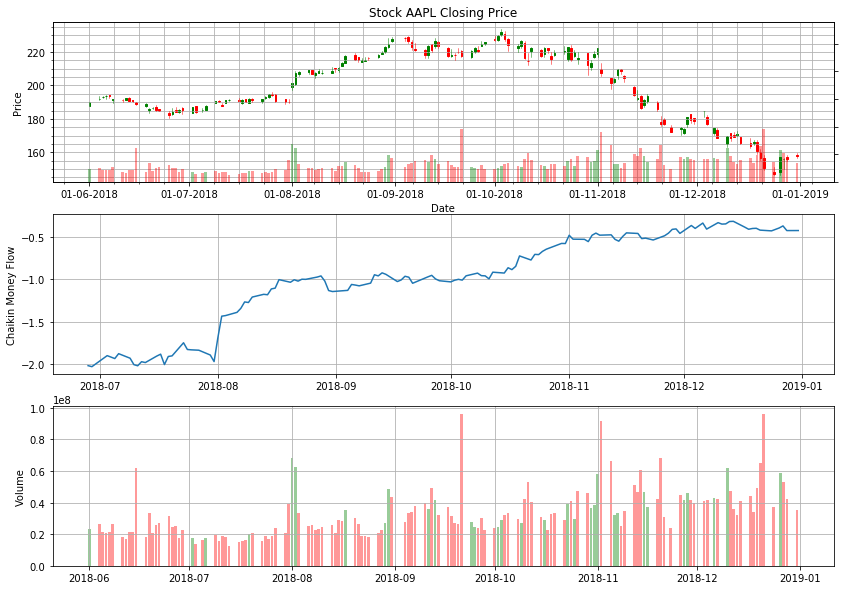

In [7]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['CMF'])
#df['Positive'] = df['CMF'] > 0
#ax2.bar(df.index, df['CMF'], color=df.Positive.map({True: 'g', False: 'r'}))
#ax2.axhline(y=0, color='red')
ax2.grid()
ax2.set_ylabel('Chaikin Money Flow')

ax3 = plt.subplot(3, 1, 3)
df['Positive'] = df['Open'] < df['Adj Close']
colors = df.Positive.map({True: 'g', False: 'r'})
ax3.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid(True)